In [1]:
import matplotlib.pyplot as plt
from astrodendro import Dendrogram
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

## Generate bottom panel of Figure 4 for Wong et al. (2022) ApJ paper

In [2]:
analdir = 'struct/'

In [3]:
line = '12'
label = '30Dor_feather_mosaic_1p8_' + line
try:
    d = Dendrogram.load_from(analdir+label+'_dendrogram.hdf5')
    print('Loading pre-existing dendrogram')
except:
    print('Could not load',label+'_dendrogram.hdf5')

Loading pre-existing dendrogram


### Get cluster id numbers and colors, including id's of substructures

In [4]:
clist = analdir+label+'_clusters.txt'
with open(clist, 'r') as data:
    clust_id = []
    clust_col = []
    cld =[]
    for txtline in data:
        p = txtline.split()
        clust_id.append(int(p[0]))
        clust_col.append(p[1])
        totlist = list(map(int, p[3].split(',')))
        totlist.insert(0,int(p[0]))
        cld.append(totlist)

In [5]:
print(len(clust_id))
print(list(clust_id))

198
[5, 10, 30, 34, 48, 49, 51, 59, 61, 78, 84, 94, 98, 113, 115, 126, 137, 159, 161, 182, 258, 276, 288, 290, 301, 302, 303, 408, 425, 434, 448, 461, 466, 470, 481, 499, 517, 521, 531, 550, 556, 576, 581, 582, 612, 620, 633, 656, 660, 665, 676, 726, 751, 763, 764, 830, 846, 877, 913, 1017, 1020, 1027, 1033, 1040, 1044, 1047, 1067, 1081, 1123, 1151, 1152, 1159, 1189, 1195, 1214, 1222, 1237, 1243, 1320, 1337, 1346, 1363, 1408, 1431, 1438, 1441, 1453, 1479, 1494, 1507, 1532, 1581, 1582, 1596, 1610, 1616, 1666, 1678, 1713, 1746, 1751, 1757, 1760, 1791, 1815, 1817, 1835, 1849, 1861, 1879, 1892, 1909, 1912, 1920, 1928, 1930, 1969, 1994, 1999, 2015, 2017, 2038, 2042, 2099, 2123, 2151, 2195, 2213, 2223, 2239, 2247, 2258, 2261, 2263, 2264, 2277, 2317, 2323, 2346, 2350, 2371, 2372, 2373, 2382, 2405, 2449, 2457, 2460, 2467, 2502, 2516, 2545, 2549, 2551, 2588, 2594, 2612, 2614, 2624, 2630, 2632, 2638, 2665, 2710, 2723, 2807, 2821, 2853, 2900, 2978, 3010, 3012, 3037, 3092, 3101, 3128, 3145, 3148, 

### Flatten the list of clusters and substructures

In [6]:
cldlist = [item for sublist in cld for item in sublist]
print(len(cldlist))

2424


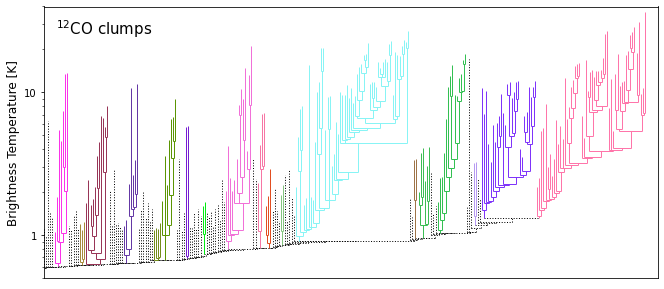

In [7]:
# Plot the tree
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)            
ax.set_yscale('log')
if line == '12':
    ax.set_xlim(1900, 2190)
    ax.set_ylim(0.5, 40)
else:
    ax.set_xlim(355, 480)
    ax.set_ylim(0.4, 20)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
ax.set_xlabel('Structure Number', fontsize=12)
ax.set_ylabel('Brightness Temperature [K]', fontsize=12)
p = d.plotter()
clusts = [d[sidx] for sidx in cldlist]
others = [s for s in d.all_structures if s not in clusts]
for st in others:
    p.plot_tree(ax, structure=[st], color='black', subtree=False, lw=1, ls=':')
for i, sidx in enumerate(clust_id):
    p.plot_tree(ax, structure=[d[sidx]], color=clust_col[i], lw=1)
ax.axes.xaxis.set_visible(False)
ax.text(0.02,0.92,'$^{'+line+'}$CO clumps',ha='left',va='center',
         fontsize=15,transform=ax.transAxes) 
plt.savefig(label+'_clust_tree.pdf', bbox_inches='tight')